In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/GLB.Ts_dSST.csv', header=[1])

In [3]:
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23,-0.19,***,***,-0.14,-0.18,-0.20
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.20,-0.21,-0.10,-0.10,-.11,-.18,0.03,-0.09,-0.18
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,-0.24,-0.16,-0.24,-0.10,-.09,.06,-0.10,-0.17,-0.17
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,-0.14,-0.22,-0.16,-0.19,-.20,-.31,-0.16,-0.12,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.30,-0.28,-0.29,-.28,-.13,-0.39,-0.34,-0.27


In [4]:
# add 0.2 to move data closer to desired plot
mean_temp = data.iloc[:, 1:13].mean(axis=1).add(0.2)

In [5]:
mean_temp_by_year = data[['Year']].assign(mean_temp=mean_temp)

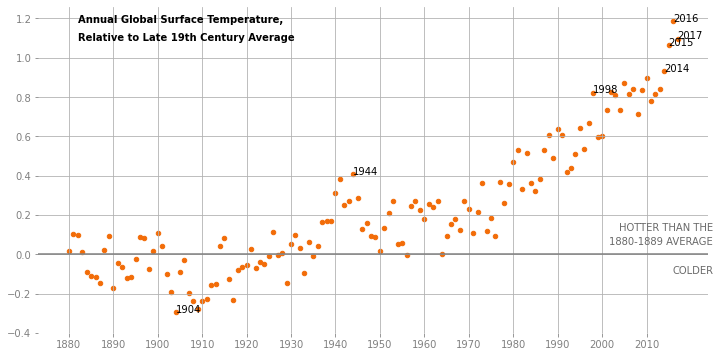

In [10]:
ax = mean_temp_by_year.plot.scatter(x='Year', y='mean_temp', c="#f26c08", figsize=(12, 6));

# set xticks
ax.set_xticks(np.arange(1880, 2020, step=10))
ax.set_yticks(np.arange(-0.4, 1.4, step=0.2))

# add labels
for i, year in enumerate([1904, 1944, 1998, 2014, 2015, 2016, 2017]):
    ax.annotate(year, (year, mean_temp[year - 1880]))

# add grid
ax.grid()

# add line
ax.axhline(y=0, color='grey', linestyle='-')

# add text
ax.text(2025, 0.05, s="HOTTER THAN THE\n1880-1889 AVERAGE",
        horizontalalignment='right',
        fontfamily='Arial',
        color='dimgray',
        linespacing = 1.5
)
ax.text(2025, -0.1, s="COLDER",
        horizontalalignment='right',
        fontfamily='Arial',
        color='dimgray'
);

ax.text(1882, 1.09, s="Annual Global Surface Temperature,\nRelative to Late 19th Century Average",
        horizontalalignment='left',
        fontfamily='Arial',
        color='black',
        linespacing = 2,
        weight="bold"
)

# remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# remove labels
ax.set_ylabel('');
ax.set_xlabel('');

# set colors for ticks (setting both axis at once or to the same value produce matplotlib bug)
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors=(0.5, 0.5, 0.5))

plt.savefig('data/hottest_year_visualization.png');